In [164]:
import json
import csv
from nltk.tokenize import word_tokenize
import string
import re
import time
import pandas as pd

import numpy as np
import itertools
import matplotlib.pyplot as plt 
from sklearn.metrics import confusion_matrix
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import metrics

# Pre Process

In [165]:
def getdata(dataurl):
    print()
    print("Retrieving TXT File....")
    tweets_data_path = dataurl
    tweets_file = open(tweets_data_path, "r")
    for line in tweets_file:
        try:
            tweet = json.loads(line)
            tweets_data.append(tweet)
        except:
            continue
    print()
    print("Successfull Retrieved from txt file......")
    print()
    time.sleep(3)
    return tweets_data
#     processdata()


def processdata(tweet_data):
    print()
    print("Recovering Data Teets.....")
    print()
    time.sleep(1)
    RE_EMOJI = re.compile('[\U00010000-\U0010ffff]', flags=re.UNICODE)
#     print(RE_EMOJI)
    for i in range(len(tweets_data)):
        q = tweets_data[i]['text']
        o = tweets_data[i]['id_str']
        q = RE_EMOJI.sub(r'', q)
        i = q.translate(str.maketrans('','',string.punctuation))
        x.append(i)
        k.append(o)
    print()
    print("Data Tweets Recovered......")
    print()
    return (x,k)
    
    
    
def readdict(dataurl):
    print()
    print("Reading Dictionary......")
    print()  
    with open(dataurl) as tsvfile:
      reader = csv.reader(tsvfile, delimiter='\t')
      for row in reader:
          i = []
          i.append(row[2])
          i.append(row[5])
          y.append(i)
    print()
    print("Dictionary Preparation Done .........")
    print()  
    return y
#     addpolarity()

def addSentimentpolarity(x,y,negvalue):
    from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
    sa = SentimentIntensityAnalyzer() 
    some_milby_t=[]
    counter=0
    start_time = time.time()
    for j in x:
        temp_sentiment = sa.polarity_scores(j)
        sum_more= 0
        if temp_sentiment['compound']<= negvalue:
            sum_more=1
        sum_var = []    
        varid = k[counter]
        sum_var.append(varid)
        sum_var.append(sum_more)
        some_milby_t.append(sum_var)
        counter += 1
    print('Done with finding the sentiments.........')
    print("Processing time: ", round((time.time() - start_time),8), "Seconds \n\n")
    return some_milby_t
        
def addpolarity(x,y):
    start_time = time.time()
    counter = 0
    print()
    print("Processing please wait...")
    print()
    for j in x:
            tweet_token = j
            token = word_tokenize(tweet_token)
            sumnum = 0
            sum_word = 0
            for t in token:
     
                for d in y:
                    if t == d[0]:
                        sentiment = d[1]
                        if sentiment == "positive":
                            sumnum += 1
                            sum_word += 1

                        elif sentiment == "negative":
                            sumnum += -1
                            sum_word += 1

                        else:
                            sumnum += 0
                            sum_word += 1


                        break
                 
            
            if sum_word != 0.0:
                sum_more = sumnum / sum_word
                if sum_more >= 0.2:
                    sum_more = 1
   
                elif (sum_more < 0.2) and (sum_more > -0.5):
                    sum_more = 0
                   
                elif sum_more <= -0.5:
                    sum_more = -1
                   
                else:
                    print("****")
                    
                
            sum_var = []    
            varid = k[counter]
            sum_var.append(varid)
            sum_var.append(sum_more)
            some_milby.append(sum_var)
            counter += 1
            
    print("Processing time: ", round((time.time() - start_time),8), "Seconds \n\n")
    time.sleep(3)
    print()
    print("Processing Finish..........")
    print()
    return some_milby
#     savetoxlsx()
    
def savetoxlsx(some_milby):
    df = pd.DataFrame(some_milby)
    df.to_excel('processed_data/output.xlsx', header=("id","sentiment"), index=False)
    #file = open("testfile_data.txt","w") 
    #file.write(some_milby) 
    #file.close() 
    print("===========================")
    print("Data Saved!............")
    print("===========================") 

In [191]:
tweets_data = []
x = []
y = []
k = []
some_milby = []
print('Starting Pre processing......')
print()

tweets_data = getdata('data/tweetdata.txt')
x,k = processdata(tweets_data)

Starting Pre processing......


Retrieving TXT File....

Successfull Retrieved from txt file......


Recovering Data Teets.....


Data Tweets Recovered......



In [192]:
import nltk
nltk.download('punkt')
# y = readdict('data/dictionary.tsv')
# some_milby=addpolarity(x,y)
some_milby_sentiments =  addSentimentpolarity(x,y,-0.5)

[nltk_data] Downloading package punkt to
[nltk_data]     /home/hokagehimanshu/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Done with finding the sentiments.........
Processing time:  2.42073059 Seconds 




In [193]:
# savetoxlsx(some_milby)
savetoxlsx(some_milby_sentiments)

Data Saved!............


# Training

In [194]:
def retrieveTweet(data_url):

    tweets_data_path = data_url
    tweets_file = open(tweets_data_path, "r")
    for line in tweets_file:
        try:
            tweet = json.loads(line)
            tweets_data.append(tweet)
        except:
            continue
    return tweets_data

def retrieveProcessedData(Pdata_url):
    sent = pd.read_excel(Pdata_url)
    for i in range(len(tweets_data)):
        if tweets_data[i]['id']==sent['id'][i]:
            x.append(tweets_data[i]['text'])
            y.append(sent['sentiment'][i])
    return (x,y)

def plot_confusion_matrix(cm, classes,normalize=False,title='Confusion matrix',cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')          
            

def getaccuracy(predictions,actual):
    actual = np.array(actual)
    accuracy = np.count_nonzero((predictions==actual) == True)/len(actual)
    return accuracy*100

def getconfusionmatrix(predictions,actual,classes,title):
    nb_matrix = confusion_matrix(actual, predictions)
    plt.figure(figsize=(8,8))
    plot_confusion_matrix(nb_matrix, classes=classes, title=title)

def nbTrain(x,y,x_test,y_test,vectorizer):
    from sklearn.naive_bayes import MultinomialNB
    start_timenb = time.time()
    train_features = vectorizer.fit_transform(x)
    actual = y

    nb = MultinomialNB()
    nb.fit(train_features, [int(r) for r in y])

    train_predictions = nb.predict(vectorizer.transform(x))
    test_predictions = nb.predict(vectorizer.transform(x_test))

    train_accuracy = getaccuracy(train_predictions,actual)
    test_accuracy = getaccuracy(test_predictions,y_test)
    #     fpr, tpr, thresholds = metrics.roc_curve(actual, predictions, pos_label=1)
    #     nbscore = format(metrics.auc(fpr, tpr))
    #     nbscore = float(nbscore)*100

    #confusion matrix
    #     classes=[-1,0,1]
    classes = [0,1]
    getconfusionmatrix(train_predictions,actual,classes,'Confusion matrix For NB classifier for training dataset')
    print("\n")
    getconfusionmatrix(test_predictions,y_test,classes,'Confusion matrix For NB classifier for testing dataset')
    print("\n")

    #    test_try= vectorizer.transform(["Lets help those in need, fight anxiety and bring happiness"])
    #    test_try2= vectorizer.transform(["Dont look down at people with anxiety rather give love and respect to all. shout! Equality."])
    #    predictr = nb.predict(test_try)
    #    predictt = nb.predict(test_try2)
    #    print(predictr)
    #    print(predictt)

    #     print("Naive Bayes  Accuracy : \n", nbscore,"%")
    print("Naive Bayes  Accuracy for training dataset: \n", train_accuracy,"%")
    print("Naive Bayes  Accuracy for testing dataset: \n", test_accuracy,"%")
    print(" Completion Speed", round((time.time() - start_timenb),5))
    print()

def datree(x,y,x_test,y_test,vectorizer):
    from sklearn import tree
    start_timedt = time.time()
    train_featurestree = vectorizer.fit_transform(x)
    actual1 = y
    dtree = tree.DecisionTreeClassifier()
    dtree = dtree.fit(train_featurestree, [int(r) for r in y])

    train_predictions = dtree.predict(vectorizer.transform(x))
    test_predictions = dtree.predict(vectorizer.transform(x_test))

    train_accuracy = getaccuracy(train_predictions,actual1)
    test_accuracy = getaccuracy(test_predictions,y_test)

    # ddd, ttt, thresholds = metrics.roc_curve(actual1, prediction1, pos_label=1)
    # dtreescore = format(metrics.auc(ddd, ttt))
    # dtreescore = float(dtreescore)*100
    classes = [0,1]
    getconfusionmatrix(train_predictions,actual1,classes,'Confusion matrix For DecisionTree classifier for training dataset')
    print("\n")
    getconfusionmatrix(test_predictions,y_test,classes,'Confusion matrix For DecisionTree classifier for testing dataset')
    print("\n")

    #     print("Decision tree Accuracy : \n", dtreescore, "%")
    print("Decision tree Accuracy for training datatset: \n", train_accuracy, "%")
    print("Decision tree Accuracy for testing datatset: \n", test_accuracy, "%")
    print(" Completion Speed", round((time.time() - start_timedt),5))
    print()

def svm(x,y,x_test,y_test,vectorizer):
    from sklearn.svm import SVC
    start_timesvm = time.time()
    train_featuressvm = vectorizer.fit_transform(x)
    actual2 = y
    svc = SVC()
    svc = svc.fit(train_featuressvm, [int(r) for r in y])

    train_predictions = svc.predict(vectorizer.transform(x))
    test_predictions = svc.predict(vectorizer.transform(x_test))

    train_accuracy = getaccuracy(train_predictions,actual2)
    test_accuracy = getaccuracy(test_predictions,y_test)

    classes = [0,1]
    getconfusionmatrix(train_predictions,actual2,classes,'Confusion matrix For SVM classifier for training dataset')
    print("\n")
    getconfusionmatrix(test_predictions,y_test,classes,'Confusion matrix For SVM classifier for testing dataset')
    print("\n")

    # sss, vvv, thresholds = metrics.roc_curve(actual2, prediction2, pos_label=1)
    # svc = format(metrics.auc(sss, vvv))
    # svc = float(svc)*100
    print("Support vector machine Accuracy for training datatset: \n", train_accuracy, "%")
    print("Support vector machine Accuracy for testing datatset: \n", test_accuracy, "%")
    print(" Completion Speed", round((time.time() - start_timesvm),5))
    print()

def knN(x,y,x_test,y_test,vectorizer):
    from sklearn.neighbors import KNeighborsClassifier
    start_timekn = time.time()
    train_featureskn = vectorizer.fit_transform(x)
    actual3 = y
    test_features3 = vectorizer.transform(x)
    kn = KNeighborsClassifier(n_neighbors=2)
    kn = kn.fit(train_featureskn, [int(i) for i in y])

    train_predictions = kn.predict(vectorizer.transform(x))
    test_predictions = kn.predict(vectorizer.transform(x_test))

    train_accuracy = getaccuracy(train_predictions,actual3)
    test_accuracy = getaccuracy(test_predictions,y_test)

    classes = [0,1]
    getconfusionmatrix(train_predictions,actual3,classes,'Confusion matrix For KNN classifier for training dataset')
    print("\n")
    getconfusionmatrix(test_predictions,y_test,classes,'Confusion matrix For KNN classifier for testing dataset')
    print("\n")

    # kkk, nnn, thresholds = metrics.roc_curve(actual3, prediction3, pos_label=1)
    # kn = format(metrics.auc(kkk, nnn))
    # kn = float(kn)*100

    print("KNN Accuracy for training datatset: \n", train_accuracy, "%")
    print("KNN Accuracy for testing datatset: \n", test_accuracy, "%")
    print(" Completion Speed", round((time.time() - start_timekn),5))
    print()


def RanFo(x,y,x_test,y_test,vectorizer):
    from sklearn.ensemble import RandomForestClassifier
    start_timerf = time.time()
    train_featuresrf = vectorizer.fit_transform(x)
    actual4 = y
    rf = RandomForestClassifier(max_depth=2, random_state=0)
    rf = rf.fit(train_featuresrf, [int(i) for i in y])

    train_predictions = kn.predict(vectorizer.transform(x))
    test_predictions = kn.predict(vectorizer.transform(x_test))

    train_accuracy = getaccuracy(train_predictions,actual4)
    test_accuracy = getaccuracy(test_predictions,y_test)

    classes = [0,1]
    getconfusionmatrix(train_predictions,actual4,classes,'Confusion matrix For Random Forest classifier for training dataset')
    print("\n")
    getconfusionmatrix(test_predictions,y_test,classes,'Confusion matrix For Random Forest classifier for testing dataset')
    print("\n")
    # rrr, fff, thresholds = metrics.roc_curve(actual4, prediction4, pos_label=1)
    # kn = format(metrics.auc(rrr, fff))
    # kn = float(kn)*100

    print("Random Forest Accuracy for training datatset: \n", train_accuracy, "%")
    print("Random Forest Accuracy for testing datatset: \n", test_accuracy, "%")
    print(" Completion Speed", round((time.time() - start_timerf),5))
    print()
    print()

def mlmodel(x,y,x_test,y_test,vectorizer,mltype):
    start_time = time.time()
    train_features = vectorizer.fit_transform(x)
    actual = y
    if mltype=='Naive Bayes':
        from sklearn.naive_bayes import MultinomialNB
        model = MultinomialNB()
        model.fit(train_features, [int(r) for r in y])
    elif mltype=='Decision Tree':
        from sklearn import tree
        model = tree.DecisionTreeClassifier()
        model = model.fit(train_features, [int(r) for r in y])
    elif mltype=='SVM':
        from sklearn.svm import SVC
        model = SVC()
        model = model.fit(train_features, [int(r) for r in y])
    elif mltype=='KNN':
        from sklearn.neighbors import KNeighborsClassifier
        model = KNeighborsClassifier(n_neighbors=2)
        model = model.fit(train_features, [int(i) for i in y])
    elif mltype=='Random Forest':
        from sklearn.ensemble import RandomForestClassifier
        model = RandomForestClassifier(max_depth=2, random_state=0)
        model = model.fit(train_features, [int(i) for i in y])

    train_predictions = model.predict(vectorizer.transform(x))
    test_predictions = model.predict(vectorizer.transform(x_test))

    train_accuracy = getaccuracy(train_predictions,actual)
    test_accuracy = getaccuracy(test_predictions,y_test)

    classes = [0,1]
    getconfusionmatrix(train_predictions,actual,classes,'Confusion matrix For '+mltype+' classifier for training dataset')
    print("\n")
    getconfusionmatrix(test_predictions,y_test,classes,'Confusion matrix For '+mltype+' classifier for testing dataset')
    print("\n")
    # rrr, fff, thresholds = metrics.roc_curve(actual4, prediction4, pos_label=1)
    # kn = format(metrics.auc(rrr, fff))
    # kn = float(kn)*100

    print(mltype," Accuracy for training datatset: \n", train_accuracy, "%")
    print(mltype," Accuracy for testing datatset: \n", test_accuracy, "%")
    print(" Completion Speed", round((time.time() - start_time),5))
    print()
    print()
    return [model,mltype,train_accuracy,test_accuracy]

In [195]:
# understanding datset
tweets_data = []
x = []
y = []
vectorizer = CountVectorizer(stop_words='english')

tweets_data = retrieveTweet('data/tweetdata.txt')  
x,y=retrieveProcessedData('processed_data/output.xlsx')

print('EXPLORING THE DATASET')
print('Total No of tweets are ',len(y))
print('No of tweets with 1 as true label, i,e as depressed are  ',np.count_nonzero(np.array(y) == 1))
print('No of tweets with 0 as true label, i,e as not depressed are  ',np.count_nonzero(np.array(y) == 0))


maxlines=5
df = pd.DataFrame({'tweettext':x,'label':y})
df = df.sample(frac = 1)
print()
print('Printing some examples of tweets showing signs of depression')
dep_df = df.loc[df['label'] == 1]
# print(dep_df['tweettext'])
count=0
for index, row in dep_df.iterrows(): 
    print (row["tweettext"])
    print()
    count+=1
    if count==maxlines:
        break
print('\n\n')
dep_df.to_csv('generated/depressedexamples.csv',index=False)

print()
print('Printing some examples of tweets that have ground truth value of not depressed')
ndep_df = df.loc[df['label'] == 0]
# print(ndep_df['tweettext'])
count=0
for index, row in ndep_df.iterrows(): 
    print (row["tweettext"])
    print()
    count+=1
    if count==maxlines:
        break
print('\n\n')
ndep_df.to_csv('generated/notdepressedexamples.csv',index=False)
print('Dividing it into train and test dataset...')
ratio = 0.8
dno = len(dep_df)
ndno = len(ndep_df)

train = pd.concat([dep_df[:int(ratio*dno)], ndep_df[:int(ratio*dno)]], ignore_index=True)
train = train.sample(frac = 1)
x_train = np.array(train['tweettext'])
y_train = np.array(train['label'])

test = pd.concat([dep_df[int(ratio*dno):], ndep_df[int(ratio*dno):]], ignore_index=True)
test = test.sample(frac = 1)
x_test = np.array(test['tweettext'])
y_test = np.array(test['label'])

print('Length of training dataset ',len(train))
print('Length of testing dataset ',len(test))

EXPLORING THE DATASET
Total No of tweets are  9331
No of tweets with 1 as true label, i,e as depressed are   3441
No of tweets with 0 as true label, i,e as not depressed are   5890

Printing some examples of tweets showing signs of depression
RT @COCONUTOILBAE: when you want to be friends w ppl but ppl think ur mean and unapproachable cus u have a resting bitch face and soci… 

RT @taestychai: It's sad that people can't even respect another human in their time of suffering. Humanity really has no hope left.

RT @dataperversion: my depression is doing a mic check in my head right now and asking for more in the monitors

RT @enchiladad: so apparently my theme this summer is gonna be: depression

RT @StrongIife: Being negative and lazy is a disease that leads to pain, hardship and depression. Be proactive, and give a damn to achieve…





Printing some examples of tweets that have ground truth value of not depressed
RT @humansofny: “I don’t think I’m going to miss eighth grade. It’s been 

Using the Models

In [172]:
# running different models
# nbTrain(x_train,y_train,x_test,y_test,vectorizer)
# datree(x_train,y_train,x_test,y_test,vectorizer)
# svm(x_train,y_train,x_test,y_test,vectorizer)
# knN(x_train,y_train,x_test,y_test,vectorizer)
# RanFo(x_train,y_train,x_test,y_test,vectorizer)





Naive Bayes  Accuracy for training datatset: 
 94.94159254099239 %
Naive Bayes  Accuracy for testing datatset: 
 96.42017245884504 %
 Completion Speed 0.51022






Decision Tree  Accuracy for training datatset: 
 99.80709463080055 %
Decision Tree  Accuracy for testing datatset: 
 99.89547948784949 %
 Completion Speed 1.7315






SVM  Accuracy for training datatset: 
 96.75275961847605 %
SVM  Accuracy for testing datatset: 
 98.01411026914032 %
 Completion Speed 18.91212






KNN  Accuracy for training datatset: 
 90.39759939984997 %
KNN  Accuracy for testing datatset: 
 95.6101384896786 %
 Completion Speed 4.22265






Random Forest  Accuracy for training datatset: 
 63.12292358803987 %
Random Forest  Accuracy for testing datatset: 
 81.99634178207474 %
 Completion Speed 0.84863




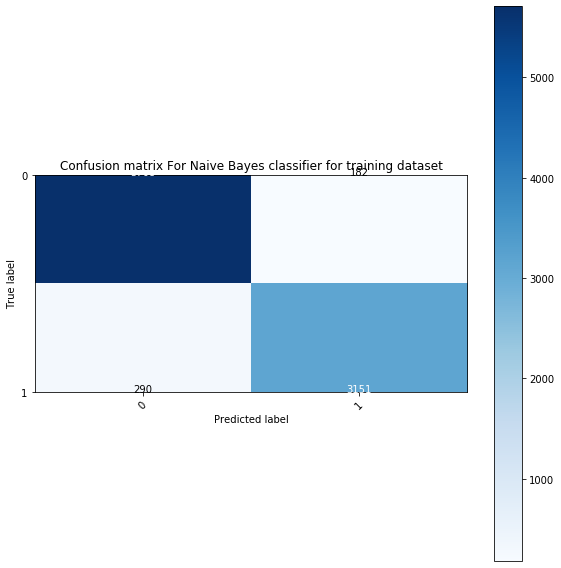

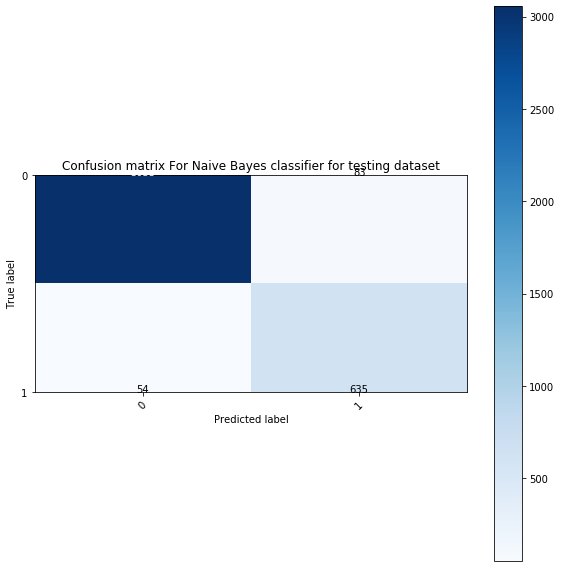

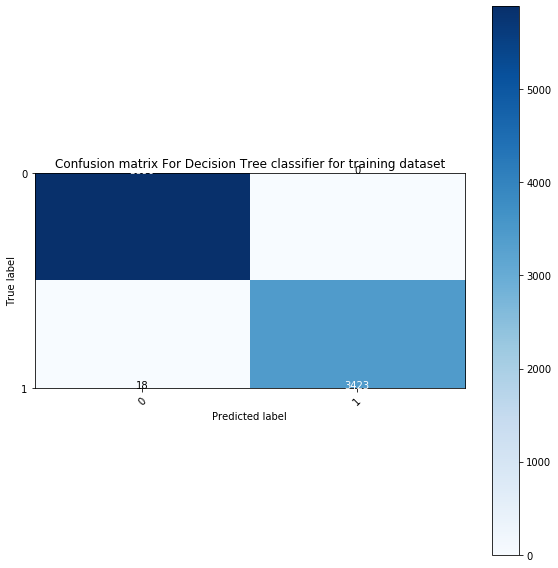

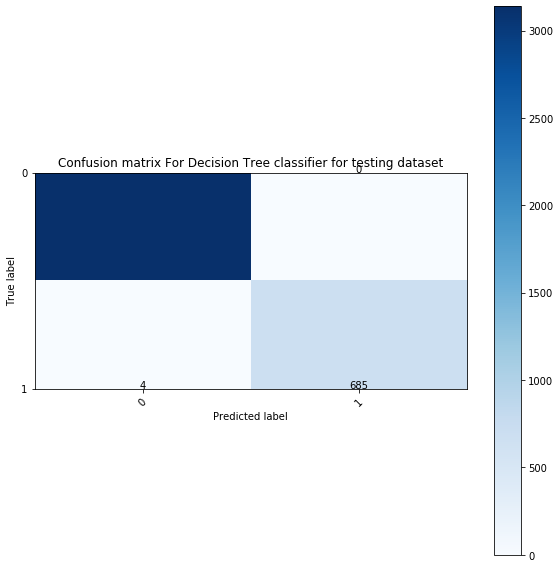

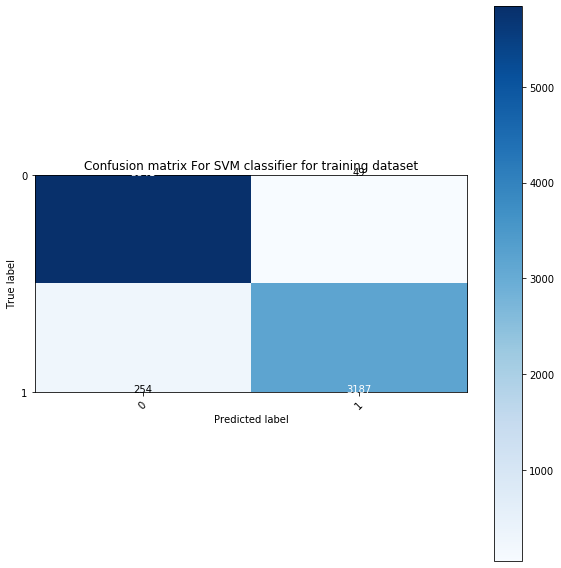

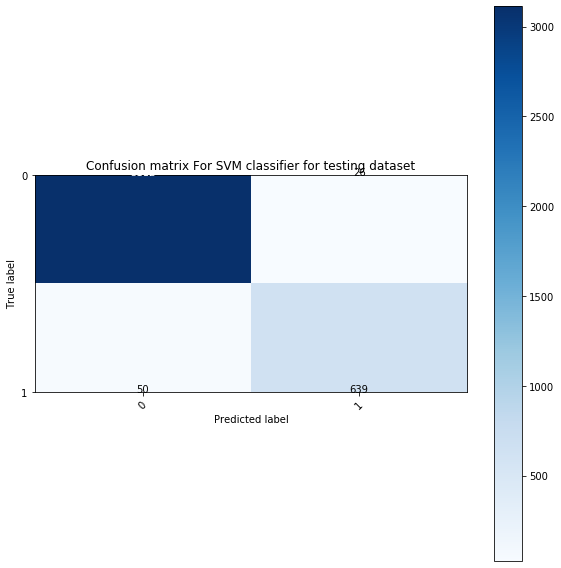

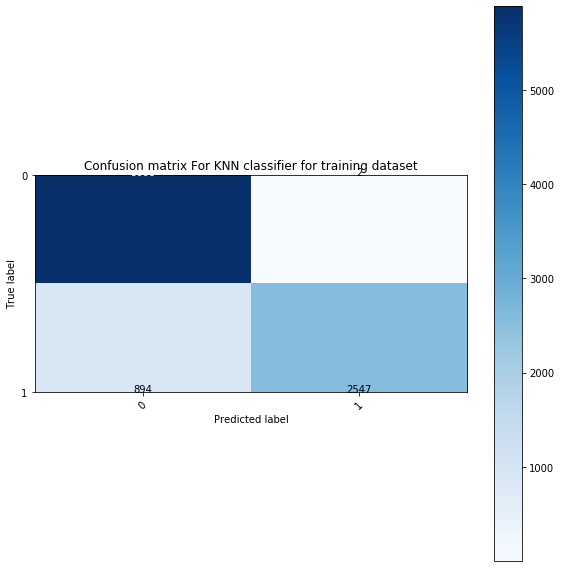

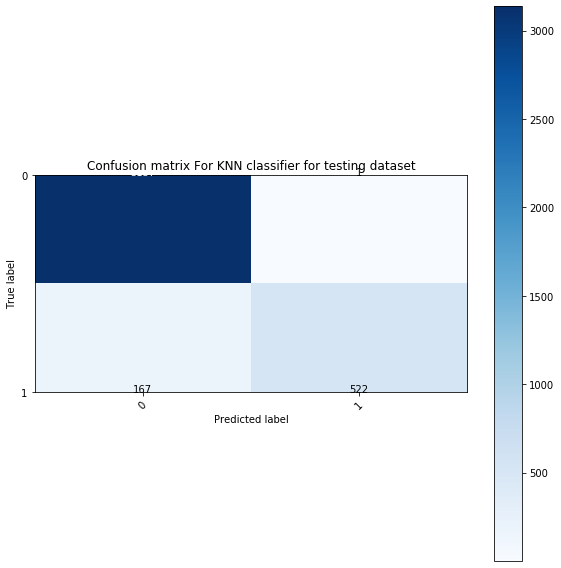

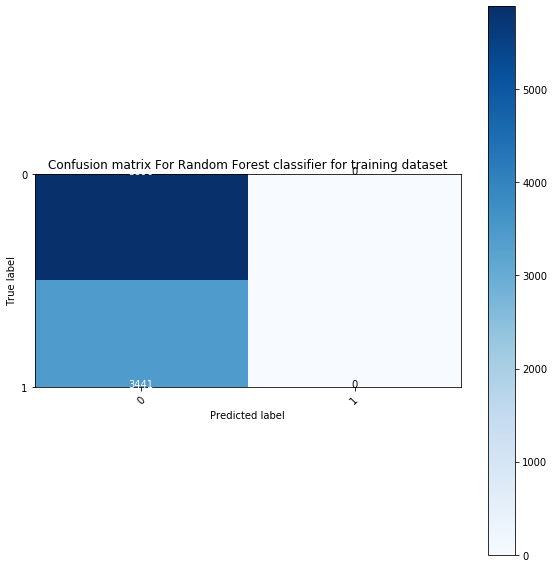

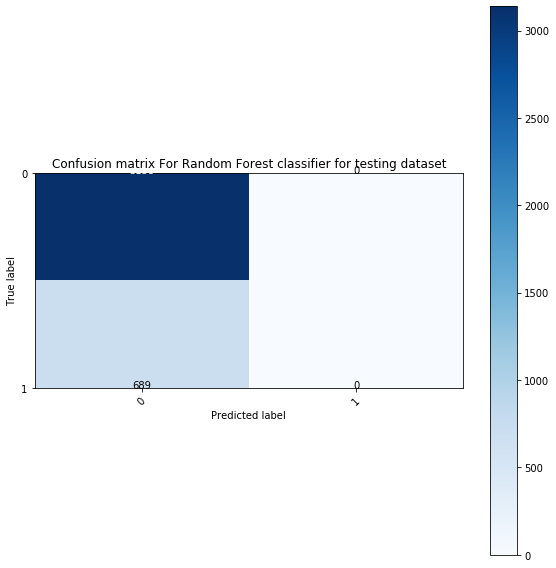

In [196]:
analysis=[]
mltype_list =['Naive Bayes','Decision Tree','SVM','KNN','Random Forest']
for t in mltype_list:
    temp = mlmodel(x,y,x_test,y_test,vectorizer,t)
    analysis.append(temp[1:])

# mlmodel(x,y,x_test,y_test,vectorizer,'Naive Bayes')
# mlmodel(x,y,x_test,y_test,vectorizer,'Decision Tree')
# mlmodel(x,y,x_test,y_test,vectorizer,'SVM')
# mlmodel(x,y,x_test,y_test,vectorizer,'KNN')
# mlmodel(x,y,x_test,y_test,vectorizer,'Random Forest')

In [197]:
analysis_df = pd.DataFrame(analysis,columns=['Model Name','Train Accuracy','Test Accuracy'])
print(analysis_df)

      Model Name  Train Accuracy  Test Accuracy
0    Naive Bayes       94.941593      96.420172
1  Decision Tree       99.807095      99.895479
2            SVM       96.752760      98.014110
3            KNN       90.397599      95.610138
4  Random Forest       63.122924      81.996342


In [198]:
analysis_df.to_csv('generated/analysis_df.csv',index=False)

# Predicting





Decision Tree  Accuracy for training datatset: 
 99.80709463080055 %
Decision Tree  Accuracy for testing datatset: 
 99.89547948784949 %
 Completion Speed 1.51573




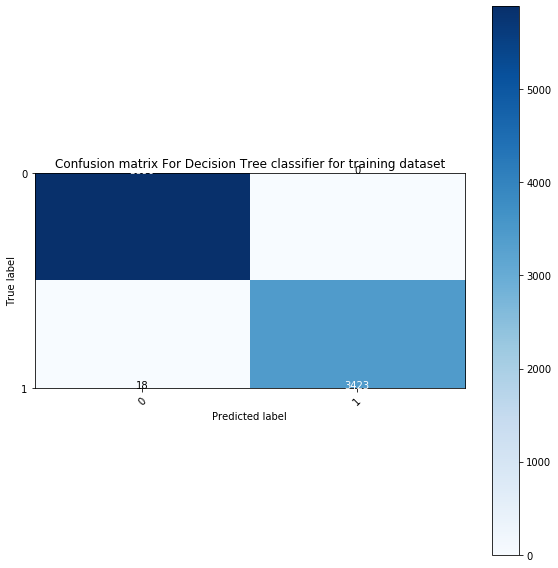

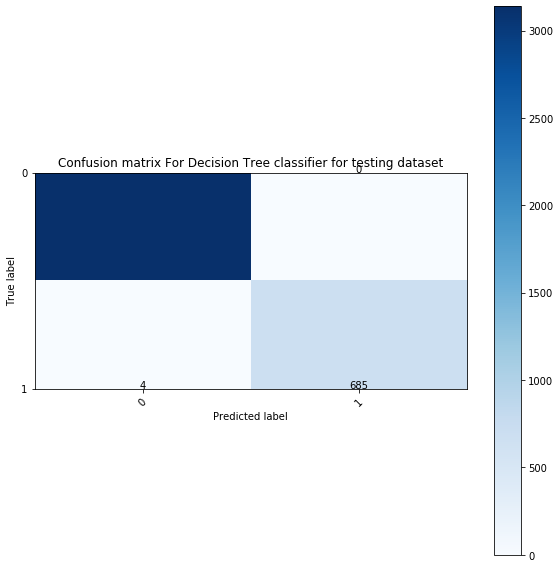

In [199]:
result = mlmodel(x,y,x_test,y_test,vectorizer,'Decision Tree')
model = result[0]

In [202]:
text = 'This depression is killing me'
# text = 'I am just feeling little sad today'
predict = model.predict(vectorizer.transform([text]))

print('Making predictions')
if predict==1:
    print('This is giving signs of Depression')
elif predict==0:
    print('This does not seem like a depressed case')

Making predictions
This is giving signs of Depression
